In [1]:
import matplotlib.pyplot as plt
import numpy as np
from   scipy import linalg as la
from   scipy import optimize
import sympy

sympy.init_printing()

In [2]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A.rank()

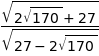

In [3]:
A.condition_number()

In [4]:
sympy.N(_)

In [5]:
A.norm()

In [6]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
np.linalg.matrix_rank(A)

2

In [7]:
np.linalg.cond(A)

In [8]:
np.linalg.norm(A)

In [9]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [10]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [11]:
L * U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [12]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [13]:
# equivalently
A.LUsolve(b)

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [14]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
P, L, U = la.lu(A)

In [15]:
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [16]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [17]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [18]:
la.solve(A, b)

array([-1.,  2.])

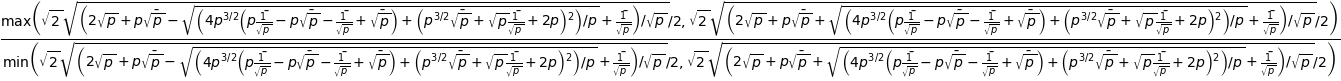

In [23]:
# Symbolic problem spec
p = sympy.symbols('p', postive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1 / sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])

x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()
Acond

In [24]:
# Numerical problem spec
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1 / np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)
x_num_sol

<function __main__.<lambda>(p)>

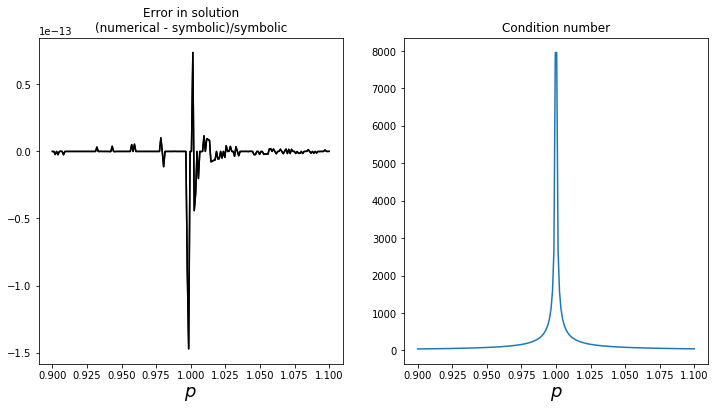

In [27]:
# Graph and compare
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym) / x_sym, 'k')
    
axes[0].set_title('Error in solution\n(numerical - symbolic)/symbolic')
axes[0].set_xlabel(r'$p$', fontsize=18)
axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title('Condition number')
axes[1].set_xlabel(r'$p$', fontsize=18);

# Rectangular Systems

In [29]:
x_vars = sympy.symbols('x1, x2, x3')
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

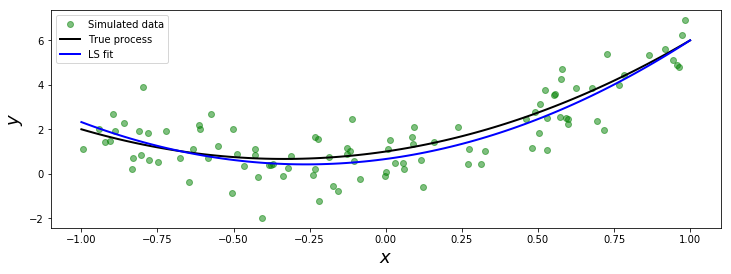

In [33]:
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b*x + c*x**2

# noise
m = 100
X = 1 - 2*np.random.rand(m)
Y = a + b*X + c*X**2 + np.random.randn(m)

# Fit using LS
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1]*x + sol[2]*x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True process')
ax.plot(x, y_fit, 'b', lw=2, label='LS fit')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend();

# Eigenvalue Problems

In [34]:
eps, delta = sympy.symbols('epsilon, Delta')
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

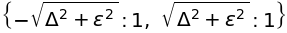

In [35]:
H.eigenvals()

In [36]:
H.eigenvects()

⎡⎛                  ⎡⎡      -Δ        ⎤⎤⎞  ⎛                 ⎡⎡      -Δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  Δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  Δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [37]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T * evec2[0])

[0]

In [38]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])
evals, evecs = la.eig(A)
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [39]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [40]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

# Nonlinear Equations